# Project: Wrangling and Analyze Data

In [1]:
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import os
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.


**1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)**

In [2]:
Twitter_archive_data = pd.read_csv('twitter-archive-enhanced.csv')# importing  WeRateDogs Twitter archive data

In [3]:
Twitter_archive_data.shape

(2356, 17)

In [4]:
Twitter_archive_data # checking the dataset

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [5]:
Twitter_archive_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

**2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)**

In [6]:
folder = 'image_predictions'
# Make directory if it doesn't already exist
if not os.path.exists(folder):
    os.makedirs(folder)
    
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)



# Save HTML to file
with open(os.path.join(folder,url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [7]:
os.listdir(folder)

['image-predictions.tsv']

In [8]:
image=pd.read_csv('image_predictions/image-predictions.tsv',sep='\t')# reading the image_prediction tsv 
image.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
365,672898206762672129,https://pbs.twimg.com/media/CVadWcCXIAAL4Sh.jpg,1,motor_scooter,0.835819,False,bobsled,0.035856,False,moped,0.033079,False
1749,823699002998870016,https://pbs.twimg.com/media/C25d3nkXEAAFBUN.jpg,1,cairn,0.203999,True,snorkel,0.171893,False,Norfolk_terrier,0.107543,True
1134,728653952833728512,https://pbs.twimg.com/media/Chyy5lQWUAEzxSL.jpg,2,window_shade,0.594333,False,studio_couch,0.053515,False,rotisserie,0.041248,False
442,674632714662858753,https://pbs.twimg.com/media/CVzG3yOVAAAqi9I.jpg,1,jellyfish,0.432748,False,goldfish,0.113111,False,coral_reef,0.087047,False
849,695629776980148225,https://pbs.twimg.com/media/Cadfl6zWcAEZqIW.jpg,1,Old_English_sheepdog,0.693857,True,otterhound,0.232117,True,West_Highland_white_terrier,0.012867,True


In [9]:
image.shape

(2075, 12)

In [10]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


**3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)**

In [11]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions

# %run ./keys.ipynb

In [12]:
# auth = OAuthHandler(API_Key, API_Secret)
# auth.set_access_token(Access_Token, Access_Token_Secret)

In [13]:
# api = tweepy.API(auth, wait_on_rate_limit=True)

In [14]:
# tweet_ids = Twitter_archive_data.tweet_id.values
# len(tweet_ids)

In [15]:
# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except  tweepy.errors.TweepyException as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)


In [16]:
df_list =[]

with open('tweet_json.txt','r') as file:
    for lines in file:
        tweets = json.loads(lines)
        tweet_id=tweets['id']
        retweet_count =tweets['retweet_count']
        favorite_count =tweets['favorite_count']
        df_list.append({'tweet_id':str(tweet_id),
                        'retweet_count':int(retweet_count),
                        'favorite_count': int(favorite_count)})
        
df_tweetdata = pd.DataFrame(df_list, columns=['tweet_id','retweet_count','favorite_count'])

In [17]:
df_tweetdata

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7010,33828
1,892177421306343426,5302,29343
2,891815181378084864,3482,22069
3,891689557279858688,7227,36955
4,891327558926688256,7765,35323
...,...,...,...
2322,666049248165822465,37,89
2323,666044226329800704,115,247
2324,666033412701032449,36,100
2325,666029285002620928,39,112


In [18]:
df_tweetdata.shape

(2327, 3)

In [19]:
df_tweetdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2327 non-null   object
 1   retweet_count   2327 non-null   int64 
 2   favorite_count  2327 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


In [20]:
df_tweetdata.describe()

,retweet_count,favorite_count
count,2327.000000,2327.000000
mean,2472.366137,7058.122475
std,4187.046127,10967.791581
min,1.000000,0.000000
25%,495.000000,1226.000000
50%,1149.000000,3053.000000
75%,2863.500000,8611.500000
max,70786.000000,144955.000000


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Quality issues
1.Twitter_archive_data: Dog name are not consistence , some rows has dog name as ( 'a,an,the,my,very,such,his....')

2.Twitter_archive_data:  tweet_id is integer,timestamp is object(wrong datatype)

3.Twitter_archive_data :  removing the retweets and replies. 

4.Twitter_archive_data:Extract the main_source of tweets from source cloumn

5.master : Removing outliers (rating_numerator ,rating_denominator)

6.image : p1,p2,p3 has a mixture of uppercase and lowercase

7.image:p1,p2,p3 has a mixture of hypen and Underscore

8.image: Renaming columns

### Tidiness issues
1.image & df_tweetdata:These  data are part of the same observation unit as the Twitter_archive_data ,(one table with information about  dog rating)

2.There are multiple dog stages columns present e.g. doggo, pupper, etc. They should be merged into 1 column 

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [21]:
# Make copies of original pieces of data
Twitter_archive_clean = Twitter_archive_data.copy()
image_clean = image.copy()
tweet_clean = df_tweetdata.copy()

In [22]:
 Twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [23]:
image_clean .sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
814,692568918515392513,https://pbs.twimg.com/media/CZx_wV2UMAArgsJ.jpg,2,golden_retriever,0.636845,True,Labrador_retriever,0.163362,True,Pekinese,0.045554,True
1629,805207613751304193,https://pbs.twimg.com/media/CyysDQlVIAAYgrl.jpg,1,Pembroke,0.244705,True,Rhodesian_ridgeback,0.180461,True,Cardigan,0.094664,True
132,668466899341221888,https://pbs.twimg.com/media/CUbfGbbWoAApZth.jpg,1,shopping_basket,0.398361,False,hamper,0.363222,False,bassinet,0.084173,False
831,693642232151285760,https://pbs.twimg.com/media/CaBP7i9W0AAJrIs.jpg,1,Scottish_deerhound,0.111893,True,bluetick,0.074302,True,German_short-haired_pointer,0.067000,True
1518,787397959788929025,https://pbs.twimg.com/media/Cu1mQsDWEAAU_VQ.jpg,1,Chihuahua,0.900483,True,toy_terrier,0.021084,True,miniature_pinscher,0.019484,True
1842,838476387338051585,https://pbs.twimg.com/media/C6Ld0wYWgAQQqMC.jpg,3,Great_Pyrenees,0.997692,True,kuvasz,0.001001,True,Newfoundland,0.000405,True
1973,869702957897576449,https://pbs.twimg.com/media/DBHOOfOXoAABKlU.jpg,1,Pembroke,0.993449,True,Cardigan,0.006325,True,Chihuahua,0.000178,True
631,680940246314430465,https://pbs.twimg.com/media/CXMvio7WQAAPZJj.jpg,1,soft-coated_wheaten_terrier,0.289598,True,West_Highland_white_terrier,0.157195,True,toy_poodle,0.074435,True
1382,765395769549590528,https://pbs.twimg.com/media/Cp87Y0jXYAQyjuV.jpg,1,Pembroke,0.509491,True,Cardigan,0.330401,True,Shetland_sheepdog,0.038875,True
744,687480748861947905,https://pbs.twimg.com/media/CYpsFmIWAAAYh9C.jpg,1,English_springer,0.472273,True,English_setter,0.166862,True,Brittany_spaniel,0.163411,True


In [24]:
tweet_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7010,33828
1,892177421306343426,5302,29343
2,891815181378084864,3482,22069
3,891689557279858688,7227,36955
4,891327558926688256,7765,35323


### Issue #1:

**Define:**
* convert `tweet_id` to string
* convert `timestamp` to datetime

**Code**

In [25]:
Twitter_archive_clean['tweet_id']=Twitter_archive_clean['tweet_id'].astype(str)
image_clean['tweet_id']=image_clean['tweet_id'].astype(str)
tweet_clean['tweet_id']=tweet_clean['tweet_id'].astype(str)
Twitter_archive_clean['timestamp'] = Twitter_archive_clean['timestamp'].astype('datetime64[ns]')

**Test**

In [26]:
Twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   object        
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         181 non-null    float64       
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    object        
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   int64         
 11  rating_denominator          2356 non-null   int64       

In [27]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [28]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2327 non-null   object
 1   retweet_count   2327 non-null   int64 
 2   favorite_count  2327 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


### Issue #2:

**Define :** 
* removing the retweets and replies. 

**Code**

Step 1: Removing rows that contain retweet and reply

In [29]:
print(Twitter_archive_clean.retweeted_status_id.value_counts().sum())
print(Twitter_archive_clean.in_reply_to_status_id.value_counts().sum())

181
78


In [30]:
# Removing rows with retweet
Twitter_archive_clean.drop(Twitter_archive_clean[Twitter_archive_clean.retweeted_status_id.notnull()].index, inplace = True)

In [31]:
# Removing rows with retweeted reply
Twitter_archive_clean.drop(Twitter_archive_clean[Twitter_archive_clean.in_reply_to_status_id.notnull()].index, inplace = True)

In [32]:
print(Twitter_archive_clean.retweeted_status_id.value_counts().sum())
print(Twitter_archive_clean.in_reply_to_status_id.value_counts().sum())

0
0


In [33]:
Twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2097 non-null   object        
 1   in_reply_to_status_id       0 non-null      float64       
 2   in_reply_to_user_id         0 non-null      float64       
 3   timestamp                   2097 non-null   datetime64[ns]
 4   source                      2097 non-null   object        
 5   text                        2097 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               2094 non-null   object        
 10  rating_numerator            2097 non-null   int64         
 11  rating_denominator          2097 non-null   int64       

Step 2: Removing the columns that contain retweet and reply

In [34]:

Twitter_archive_clean. drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_status_id','in_reply_to_user_id'], axis =1,inplace=True)

**Test**

In [35]:
Twitter_archive_clean .info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   object        
 1   timestamp           2097 non-null   datetime64[ns]
 2   source              2097 non-null   object        
 3   text                2097 non-null   object        
 4   expanded_urls       2094 non-null   object        
 5   rating_numerator    2097 non-null   int64         
 6   rating_denominator  2097 non-null   int64         
 7   name                2097 non-null   object        
 8   doggo               2097 non-null   object        
 9   floofer             2097 non-null   object        
 10  pupper              2097 non-null   object        
 11  puppo               2097 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 213.0+ KB


### Issue #3:

**Define:** 
* convert p1,p2,p3 to lowercase( to make it uniform)
* convert p1,p2,p3 to underscore( to make it uniform)

**Code**

In [36]:
image_clean['p1']=image_clean['p1'].str.lower()
image_clean['p2']=image_clean['p2'].str.lower()
image_clean['p3']=image_clean['p3'].str.lower()

In [37]:
image_clean['p1']=image_clean['p1'].str.replace('-', '_')
image_clean['p2']=image_clean['p2'].str.replace('-', '_')
image_clean['p3']=image_clean['p3'].str.replace('-', '_')

**Test**

In [38]:
image_clean.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
314,671729906628341761,https://pbs.twimg.com/media/CVJ2yR2UwAAdCzU.jpg,1,kuvasz,0.431469,True,samoyed,0.117122,True,white_wolf,0.090067,False
414,674008982932058114,https://pbs.twimg.com/media/CVqPkVoU4AAkXA7.jpg,1,jigsaw_puzzle,0.970810,False,prayer_rug,0.011048,False,quill,0.008432,False
1566,793962221541933056,https://pbs.twimg.com/media/CwS4aqZXUAAe3IO.jpg,1,labrador_retriever,0.861651,True,golden_retriever,0.044462,True,staffordshire_bullterrier,0.016497,True
1845,838921590096166913,https://pbs.twimg.com/media/C6Ryuf7UoAAFX4a.jpg,1,border_terrier,0.664538,True,brabancon_griffon,0.170451,True,yorkshire_terrier,0.087824,True
357,672609152938721280,https://pbs.twimg.com/media/CVWWdKLWEAEnSk7.jpg,1,microwave,0.981946,False,rotisserie,0.007472,False,television,0.005881,False
875,698195409219559425,https://pbs.twimg.com/media/CbB9BTqW8AEVc2A.jpg,1,labrador_retriever,0.643690,True,american_staffordshire_terrier,0.102684,True,dalmatian,0.050008,True
1982,871762521631449091,https://pbs.twimg.com/media/DBkfY58XcAEdzZy.jpg,2,labrador_retriever,0.921393,True,golden_retriever,0.064608,True,bloodhound,0.003383,True
1086,718631497683582976,https://pbs.twimg.com/media/CfkXiX6W4AAmICF.jpg,1,pomeranian,0.993718,True,pekinese,0.003611,True,persian_cat,0.000525,False
1175,737445876994609152,https://pbs.twimg.com/media/CjvvHBwUoAE55WZ.jpg,1,samoyed,0.400568,True,pomeranian,0.331268,True,maltese_dog,0.045426,True
729,686606069955735556,https://pbs.twimg.com/media/CYdQktMWsAEI29_.jpg,1,labrador_retriever,0.320012,True,ibizan_hound,0.208172,True,saluki,0.078975,True


### Issue #4:

**Define:** 
* Extract the main_source of tweets

**Code**

In [39]:
Twitter_archive_clean['main_source']=Twitter_archive_clean['source'].str.extract('(?:.*/)([a-z]+)(?:")')

**Test**

In [40]:
Twitter_archive_clean['main_source']

0       iphone
1       iphone
2       iphone
3       iphone
4       iphone
         ...  
2351    iphone
2352    iphone
2353    iphone
2354    iphone
2355    iphone
Name: main_source, Length: 2097, dtype: object

In [41]:
Twitter_archive_clean['main_source'].unique()

array(['iphone', nan, 'tweetdeck'], dtype=object)

In [42]:
Twitter_archive_clean.drop(['source'], axis = 1,inplace =True)

In [43]:
Twitter_archive_clean['main_source']=Twitter_archive_clean['main_source'].fillna('Vine')

In [44]:
Twitter_archive_clean['main_source'].unique()

array(['iphone', 'Vine', 'tweetdeck'], dtype=object)

### Issue #5:

**Define:** 
* merging the dog stage into one column

**Code**

In [45]:
dog_col = ["doggo","floofer","pupper","puppo"]
Twitter_archive_clean[dog_col] = Twitter_archive_clean[dog_col].replace({'None':np.nan})

In [46]:
# create a new column to represent dog stages by merging all relevant columns
Twitter_archive_clean['dog_stage'] = Twitter_archive_clean[Twitter_archive_clean.columns[7:11]].apply(
    lambda x: ','.join(x.dropna().astype(str)), axis=1)

In [47]:
Twitter_archive_clean['dog_stage']= Twitter_archive_clean['dog_stage'].replace('',np.nan)#drop columns after merging
Twitter_archive_clean.drop(["doggo","floofer","pupper","puppo"], axis=1, inplace=True)

In [48]:
Twitter_archive_clean['dog_stage'].value_counts()

pupper           221
doggo             72
puppo             23
floofer            9
doggo,pupper       9
doggo,puppo        1
doggo,floofer      1
Name: dog_stage, dtype: int64

In [49]:
# Fixing the dogs with two classifications.
Twitter_archive_clean['dog_stage']=Twitter_archive_clean['dog_stage'].str.replace('doggo,pupper', 'multiclass')
Twitter_archive_clean['dog_stage']=Twitter_archive_clean['dog_stage'].str.replace('doggo,puppo', 'multiclass')
Twitter_archive_clean['dog_stage']=Twitter_archive_clean['dog_stage'].str.replace('doggo,floofer', 'multiclass')

In [50]:
Twitter_archive_clean['dog_stage'].value_counts()

pupper        221
doggo          72
puppo          23
multiclass     11
floofer         9
Name: dog_stage, dtype: int64

**Test**

In [51]:
Twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   object        
 1   timestamp           2097 non-null   datetime64[ns]
 2   text                2097 non-null   object        
 3   expanded_urls       2094 non-null   object        
 4   rating_numerator    2097 non-null   int64         
 5   rating_denominator  2097 non-null   int64         
 6   name                2097 non-null   object        
 7   main_source         2097 non-null   object        
 8   dog_stage           336 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 163.8+ KB


### Issue #6:

**Define:** 
* Twitter_archive_data: Dog name are not consistence ,some rows has dog name as ( 'a,an,the,my,very,such,his....')

**Code**

In [52]:
name_set =set()
for x in Twitter_archive_clean['name']:
    if x[0].islower():
        name_set.add(x)
wrong_name = list((name_set))+['None']
Twitter_archive_clean['name'].replace(wrong_name,'No name',inplace=True)
        

In [53]:
Twitter_archive_clean['name'].value_counts()

No name       707
Lucy           11
Charlie        11
Oliver         10
Cooper         10
             ... 
Shelby          1
Sephie          1
Bonaparte       1
Wishes          1
Christoper      1
Name: name, Length: 930, dtype: int64

**Test**

In [54]:
Twitter_archive_clean.sample(10)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,main_source,dog_stage
1536,689905486972461056,2016-01-20 20:21:00,Say hello to Gizmo. He's quite the pupper. Con...,https://twitter.com/dog_rates/status/689905486...,11,10,Gizmo,iphone,pupper
1753,678800283649069056,2015-12-21 04:52:53,Here's a pupper with some mean tan lines. Snaz...,https://twitter.com/dog_rates/status/678800283...,12,10,No name,iphone,pupper
2187,668979806671884288,2015-11-24 02:29:49,This is Chaz. He's an X Games half pipe supers...,https://twitter.com/dog_rates/status/668979806...,12,10,Chaz,iphone,NaN
1332,705475953783398401,2016-03-03 19:32:29,Say hello to Zara. She found a sandal and coul...,https://twitter.com/dog_rates/status/705475953...,12,10,Zara,iphone,NaN
2206,668631377374486528,2015-11-23 03:25:17,Meet Zeek. He is a grey Cumulonimbus. Zeek is ...,https://twitter.com/dog_rates/status/668631377...,5,10,Zeek,iphone,NaN
280,839549326359670784,2017-03-08 18:52:12,Meet Winston. He knows he's a little too big f...,https://twitter.com/dog_rates/status/839549326...,12,10,Winston,iphone,NaN
1586,686760001961103360,2016-01-12 04:01:58,This pupper forgot how to walk. 12/10 happens ...,https://vine.co/v/iMvubwT260D,12,10,No name,Vine,pupper
371,828408677031882754,2017-02-06 01:03:14,This is Bear. He went outside to play in the s...,https://twitter.com/dog_rates/status/828408677...,12,10,Bear,iphone,NaN
63,879862464715927552,2017-06-28 00:42:13,This is Romeo. He would like to do an entrance...,https://twitter.com/dog_rates/status/879862464...,13,10,Romeo,iphone,NaN
1849,675781562965868544,2015-12-12 20:57:34,Say hello to Buddah. He was Waldo for Hallowee...,https://twitter.com/dog_rates/status/675781562...,11,10,Buddah,iphone,NaN


In [55]:
Twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   object        
 1   timestamp           2097 non-null   datetime64[ns]
 2   text                2097 non-null   object        
 3   expanded_urls       2094 non-null   object        
 4   rating_numerator    2097 non-null   int64         
 5   rating_denominator  2097 non-null   int64         
 6   name                2097 non-null   object        
 7   main_source         2097 non-null   object        
 8   dog_stage           336 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 163.8+ KB


### Issue #7:

**Define:** 
* filtering image data not related to dog rating
* removal of columns not needed for my analysis

**Code**

In [56]:
image_clean.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
257,670778058496974848,https://pbs.twimg.com/media/CU8VFhuVAAAQW8B.jpg,1,pug,0.776612,True,brabancon_griffon,0.112032,True,boxer,0.039051,True
1106,723179728551723008,https://pbs.twimg.com/media/CglAHjAUgAAfxcq.jpg,1,tennis_ball,0.176495,False,badger,0.059905,False,norwegian_elkhound,0.056850,True
1728,820690176645140481,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,2,west_highland_white_terrier,0.872064,True,kuvasz,0.059526,True,samoyed,0.037400,True
416,674019345211760640,https://pbs.twimg.com/media/CVqZBO8WUAAd931.jpg,1,collie,0.992732,True,borzoi,0.005043,True,shetland_sheepdog,0.001725,True
1152,732585889486888962,https://pbs.twimg.com/media/Ciqq-VFUUAANlWm.jpg,2,staffordshire_bullterrier,0.843359,True,american_staffordshire_terrier,0.028290,True,miniature_pinscher,0.016793,True
677,683481228088049664,https://pbs.twimg.com/media/CXw2jSpWMAAad6V.jpg,1,keeshond,0.508951,True,chow,0.442016,True,german_shepherd,0.013206,True
561,677895101218201600,https://pbs.twimg.com/media/CWhd_7WWsAAaqWG.jpg,1,dalmatian,0.550702,True,kuvasz,0.060226,True,great_pyrenees,0.058631,True
859,696894894812565505,https://pbs.twimg.com/media/CaveNQcVIAECyBr.jpg,1,appenzeller,0.665628,True,beagle,0.104795,True,greater_swiss_mountain_dog,0.067868,True
413,673956914389192708,https://pbs.twimg.com/media/CVpgPGwWoAEV7gG.jpg,1,pug,0.586161,True,brabancon_griffon,0.082744,True,chihuahua,0.045878,True
196,669597912108789760,https://pbs.twimg.com/media/CUrjvxiVEAA94dH.jpg,1,eskimo_dog,0.595665,True,siberian_husky,0.214474,True,white_wolf,0.147235,False


In [57]:
image_clean['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [58]:
image_clean = image_clean[image_clean['p1_dog']== True]

In [59]:
# The "p1" and "p1_conf" columns will be renamed with more explanatory titles.

# Code
new_col_names = {'p1':'dog_breed_prediction', 'p1_conf':'prediction_confidence'}

image_clean.rename(columns= new_col_names, inplace=True)

In [60]:

# The "p2" and "p3" related columns will be removed as ("p1") has the higest prediction  

# After removal of "False" entries, the "p1_dog" column will be removed as it will no longer add any valuable information.

# Code
preds_drop_cols = ['jpg_url', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p2_conf', 'p3_dog', 'p3_conf']

image_clean.drop(preds_drop_cols, inplace=True, axis=1)

**Test**

In [61]:
image_clean.sample(10)

,tweet_id,img_num,dog_breed_prediction,prediction_confidence
724,686034024800862208,1,great_dane,0.236920
1822,834786237630337024,1,border_terrier,0.156276
1255,748346686624440324,1,borzoi,0.596455
689,684188786104872960,1,kelpie,0.537782
692,684222868335505415,1,soft_coated_wheaten_terrier,0.791182
815,692752401762250755,1,samoyed,0.471276
1316,755110668769038337,1,labrador_retriever,0.708974
898,699779630832685056,1,malinois,0.706038
1007,709198395643068416,1,borzoi,0.490783
1540,790987426131050500,1,cocker_spaniel,0.349195


In [62]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2073
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1532 non-null   object 
 1   img_num                1532 non-null   int64  
 2   dog_breed_prediction   1532 non-null   object 
 3   prediction_confidence  1532 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 59.8+ KB


### Issue #8:

**Define:Twitter_archive_clean data**   
* column name renamed with more explanatory titles.
* Drop  more column for that i will not need for my analysis


**Code**

In [63]:
drop_cols = ['text', 'expanded_urls']

Twitter_archive_clean.drop(drop_cols, inplace=True, axis=1)

**Test**

In [64]:
Twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   object        
 1   timestamp           2097 non-null   datetime64[ns]
 2   rating_numerator    2097 non-null   int64         
 3   rating_denominator  2097 non-null   int64         
 4   name                2097 non-null   object        
 5   main_source         2097 non-null   object        
 6   dog_stage           336 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 131.1+ KB


### Issue #9:

**Define**

* image & df_tweetdata:These  data are part of the same observation unit as the Twitter_archive_data ,(one table with information about  dog rating) : Merging the Three(3) Dataset


**Code**

In [65]:
Twitter_archive = pd.merge(Twitter_archive_clean, tweet_clean, on='tweet_id')

In [66]:
df = pd.merge(Twitter_archive, image_clean, on='tweet_id')

In [67]:
df.sample(10)

,tweet_id,timestamp,rating_numerator,rating_denominator,name,main_source,dog_stage,retweet_count,favorite_count,img_num,dog_breed_prediction,prediction_confidence
553,751456908746354688,2016-07-08 16:44:23,12,10,No name,iphone,pupper,925,3016,1,golden_retriever,0.714409
1275,670840546554966016,2015-11-29 05:43:44,10,10,Colby,iphone,NaN,166,524,1,shih_tzu,0.963622
351,797545162159308800,2016-11-12 21:02:38,12,10,Cassie,iphone,NaN,4623,13894,1,pembroke,0.954089
217,828650029636317184,2017-02-06 17:02:17,14,10,No name,iphone,NaN,1244,8971,1,golden_retriever,0.649209
1009,683828599284170753,2016-01-04 01:53:37,12,10,No name,iphone,pupper,973,2589,1,malamute,0.577376
756,710269109699739648,2016-03-17 00:58:46,13,10,No name,iphone,NaN,1019,2205,1,pug,0.415495
1215,673240798075449344,2015-12-05 20:41:29,6,10,No name,iphone,NaN,618,1279,1,airedale,0.443004
1040,681261549936340994,2015-12-27 23:53:05,9,10,Panda,iphone,NaN,236,1336,1,tibetan_terrier,0.382101
532,756303284449767430,2016-07-22 01:42:09,11,10,No name,iphone,NaN,1006,3707,1,golden_retriever,0.981652
506,761334018830917632,2016-08-04 22:52:29,10,10,Bruce,iphone,NaN,1342,4839,1,norwegian_elkhound,0.822936


**Test**

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1455 entries, 0 to 1454
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               1455 non-null   object        
 1   timestamp              1455 non-null   datetime64[ns]
 2   rating_numerator       1455 non-null   int64         
 3   rating_denominator     1455 non-null   int64         
 4   name                   1455 non-null   object        
 5   main_source            1455 non-null   object        
 6   dog_stage              226 non-null    object        
 7   retweet_count          1455 non-null   int64         
 8   favorite_count         1455 non-null   int64         
 9   img_num                1455 non-null   int64         
 10  dog_breed_prediction   1455 non-null   object        
 11  prediction_confidence  1455 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory u

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named `"twitter_archive_master.csv".`

In [69]:
df.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [70]:
master=pd.read_csv('twitter_archive_master.csv')
master.head()

,tweet_id,timestamp,rating_numerator,rating_denominator,name,main_source,dog_stage,retweet_count,favorite_count,img_num,dog_breed_prediction,prediction_confidence
0,892177421306343426,2017-08-01 00:17:27,13,10,Tilly,iphone,NaN,5302,29343,1,chihuahua,0.323581
1,891815181378084864,2017-07-31 00:18:03,12,10,Archie,iphone,NaN,3482,22069,1,chihuahua,0.716012
2,891327558926688256,2017-07-29 16:00:24,12,10,Franklin,iphone,NaN,7765,35323,2,basset,0.555712
3,891087950875897856,2017-07-29 00:08:17,13,10,No name,iphone,NaN,2602,17815,1,chesapeake_bay_retriever,0.425595
4,890971913173991426,2017-07-28 16:27:12,13,10,Jax,iphone,NaN,1666,10370,1,appenzeller,0.341703


In [71]:
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455 entries, 0 to 1454
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1455 non-null   int64  
 1   timestamp              1455 non-null   object 
 2   rating_numerator       1455 non-null   int64  
 3   rating_denominator     1455 non-null   int64  
 4   name                   1455 non-null   object 
 5   main_source            1455 non-null   object 
 6   dog_stage              226 non-null    object 
 7   retweet_count          1455 non-null   int64  
 8   favorite_count         1455 non-null   int64  
 9   img_num                1455 non-null   int64  
 10  dog_breed_prediction   1455 non-null   object 
 11  prediction_confidence  1455 non-null   float64
dtypes: float64(1), int64(6), object(5)
memory usage: 136.5+ KB


In [72]:
master['tweet_id']=master['tweet_id'].astype(str)
master['timestamp'] = master['timestamp'].astype('datetime64[ns]')

In [73]:
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455 entries, 0 to 1454
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               1455 non-null   object        
 1   timestamp              1455 non-null   datetime64[ns]
 2   rating_numerator       1455 non-null   int64         
 3   rating_denominator     1455 non-null   int64         
 4   name                   1455 non-null   object        
 5   main_source            1455 non-null   object        
 6   dog_stage              226 non-null    object        
 7   retweet_count          1455 non-null   int64         
 8   favorite_count         1455 non-null   int64         
 9   img_num                1455 non-null   int64         
 10  dog_breed_prediction   1455 non-null   object        
 11  prediction_confidence  1455 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory u

In [74]:
master.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,prediction_confidence
count,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000
mean,11.465292,10.460481,2261.508591,8045.643986,1.213058,0.614492
std,7.156532,6.148410,4115.398569,11733.710654,0.574535,0.260242
min,1.000000,2.000000,11.000000,66.000000,1.000000,0.044333
25%,10.000000,10.000000,523.000000,1849.000000,1.000000,0.392321
50%,11.000000,10.000000,1142.000000,3800.000000,1.000000,0.615678
75%,12.000000,10.000000,2599.500000,10028.500000,1.000000,0.853227
max,165.000000,150.000000,70786.000000,144955.000000,4.000000,0.999956


In [75]:
master.shape

(1455, 12)

In [76]:
master.isna().sum()

tweet_id                    0
timestamp                   0
rating_numerator            0
rating_denominator          0
name                        0
main_source                 0
dog_stage                1229
retweet_count               0
favorite_count              0
img_num                     0
dog_breed_prediction        0
prediction_confidence       0
dtype: int64

In [77]:
master.duplicated().sum()

0

### Issue #8:
**Define**
* dealing with outliers in rating_numerator 

**Code**

In [78]:

def func(x):
    outlier= []
    max = x.max()
    min = x.min()
    mean = x.mean()
    sort = x.sort_values()
    median =sort.median()
    Q1,Q3 = np.percentile(sort,[25,75])
    IQR = Q3-Q1
    LB = Q1 - (1.5*IQR)
    UB = Q1 + (1.5*IQR)
    
    for i in x:
        if i< LB or i>UB:
            outlier.append(i)
            
    
    print({'min =': min,'max =': max, 'mean =': mean,'median =' : median,'quantile 1 =': Q1,'quantile 3 =': Q3,
           'lower_bound =': LB,'upper_bound =': UB},outlier,len(outlier))
 




In [79]:
func(master.rating_denominator)

{'min =': 2, 'max =': 150, 'mean =': 10.460481099656358, 'median =': 10.0, 'quantile 1 =': 10.0, 'quantile 3 =': 10.0, 'lower_bound =': 10.0, 'upper_bound =': 10.0} [70, 7, 150, 11, 20, 50, 90, 80, 50, 50, 40, 110, 80, 2] 14


In [80]:
# From Above its obsever there are 23 outliers and will be dropping them
master.drop(master[master.rating_denominator != 10].index, inplace = True)

**Test**

In [81]:
func(master.rating_denominator)

{'min =': 10, 'max =': 10, 'mean =': 10.0, 'median =': 10.0, 'quantile 1 =': 10.0, 'quantile 3 =': 10.0, 'lower_bound =': 10.0, 'upper_bound =': 10.0} [] 0


### Issue #9:
**Define**
* dealing with outliers in rating_numerator

**Code**

In [82]:
func(master.rating_numerator)

{'min =': 2, 'max =': 75, 'mean =': 10.970159611380986, 'median =': 11.0, 'quantile 1 =': 10.0, 'quantile 3 =': 12.0, 'lower_bound =': 7.0, 'upper_bound =': 13.0} [14, 14, 5, 14, 14, 14, 14, 6, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 75, 5, 14, 27, 3, 14, 5, 4, 6, 3, 6, 5, 4, 26, 2, 6, 5, 5, 6, 5, 6, 6, 5, 6, 6, 3, 5, 6, 4, 4, 6, 5, 6] 52


In [83]:
# From Above its obsever there are 188 outliers and will be dropping them
master.drop(master[master.rating_numerator < 7].index, inplace = True)
master.drop(master[master.rating_numerator > 14].index, inplace = True)

**Test**

In [84]:
master.rating_numerator.value_counts()

12    376
10    316
11    305
13    204
9     106
8      58
7      24
14     19
Name: rating_numerator, dtype: int64

In [85]:
func(master. rating_numerator)

{'min =': 7, 'max =': 14, 'mean =': 11.030539772727273, 'median =': 11.0, 'quantile 1 =': 10.0, 'quantile 3 =': 12.0, 'lower_bound =': 7.0, 'upper_bound =': 13.0} [14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 19


In [86]:
master.head()

,tweet_id,timestamp,rating_numerator,rating_denominator,name,main_source,dog_stage,retweet_count,favorite_count,img_num,dog_breed_prediction,prediction_confidence
0,892177421306343426,2017-08-01 00:17:27,13,10,Tilly,iphone,NaN,5302,29343,1,chihuahua,0.323581
1,891815181378084864,2017-07-31 00:18:03,12,10,Archie,iphone,NaN,3482,22069,1,chihuahua,0.716012
2,891327558926688256,2017-07-29 16:00:24,12,10,Franklin,iphone,NaN,7765,35323,2,basset,0.555712
3,891087950875897856,2017-07-29 00:08:17,13,10,No name,iphone,NaN,2602,17815,1,chesapeake_bay_retriever,0.425595
4,890971913173991426,2017-07-28 16:27:12,13,10,Jax,iphone,NaN,1666,10370,1,appenzeller,0.341703


In [87]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1408 entries, 0 to 1454
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               1408 non-null   object        
 1   timestamp              1408 non-null   datetime64[ns]
 2   rating_numerator       1408 non-null   int64         
 3   rating_denominator     1408 non-null   int64         
 4   name                   1408 non-null   object        
 5   main_source            1408 non-null   object        
 6   dog_stage              224 non-null    object        
 7   retweet_count          1408 non-null   int64         
 8   favorite_count         1408 non-null   int64         
 9   img_num                1408 non-null   int64         
 10  dog_breed_prediction   1408 non-null   object        
 11  prediction_confidence  1408 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory u

## Analyzing and Visualizing Data

### Insights:

1. Most used Twitter source

2. Dog Rating distribution

3. Retweeting and Favoriting trend over time

4. Top 6 common dog names

5. Most Popular Dog_stage

6. Dog stage with the higest image post

7. Top 10 common dog_breed_prediction

### Visualization

**1. Most used Twitter source**

In [88]:
master['main_source'].value_counts()

iphone       1383
Vine           19
tweetdeck       6
Name: main_source, dtype: int64

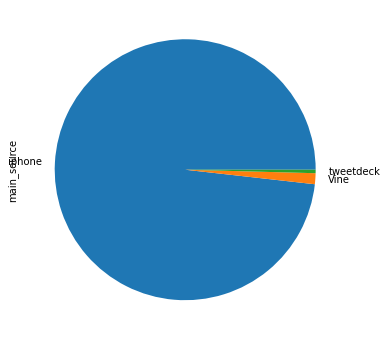

In [89]:
master['main_source'].value_counts().plot(kind='pie',figsize = (10,6));

WeRateDogs has posted 98% of the tweets from iPhone.

**2. Dog Rating distribution**

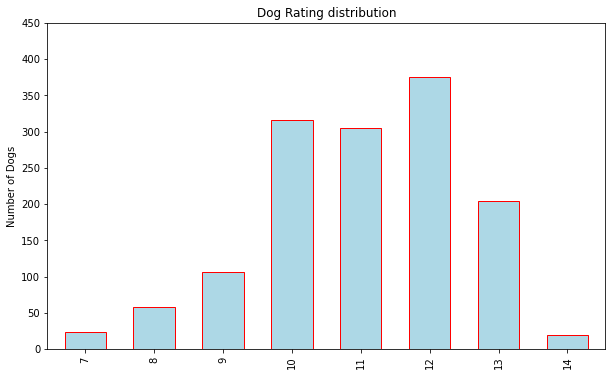

In [90]:
ax = master.rating_numerator.value_counts().sort_index().plot.bar(width=0.6,edgecolor='red',facecolor='lightblue',figsize=(10,6),title='Dog Rating distribution')
ax.set_ylabel("Number of Dogs")
ax.set_yticks([0, 50, 100, 150, 200, 250, 300, 350, 400, 450]);

**3. Retweeting and Favoriting trend over time**

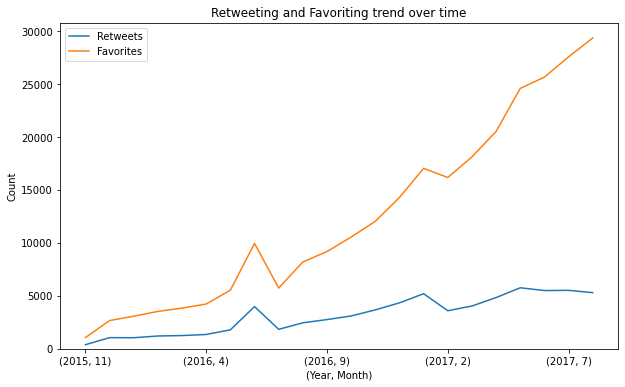

In [91]:
plt.subplots(1, sharex=True,figsize = (10,6))
master.retweet_count.groupby([master["timestamp"].dt.year, master["timestamp"].dt.month]).mean().plot(kind='line')
master.favorite_count.groupby([master["timestamp"].dt.year, master["timestamp"].dt.month]).mean().plot(kind='line').set_ylim(0, )
plt.title('Retweeting and Favoriting trend over time')
plt.ylabel('Count')
plt.xlabel('(Year, Month)')
plt.legend(('Retweets', 'Favorites'));

**4. Top 6 common dog names**

In [92]:
master.name.value_counts()[1:7]

Cooper     10
Oliver      9
Charlie     9
Tucker      8
Sadie       7
Lucy        7
Name: name, dtype: int64

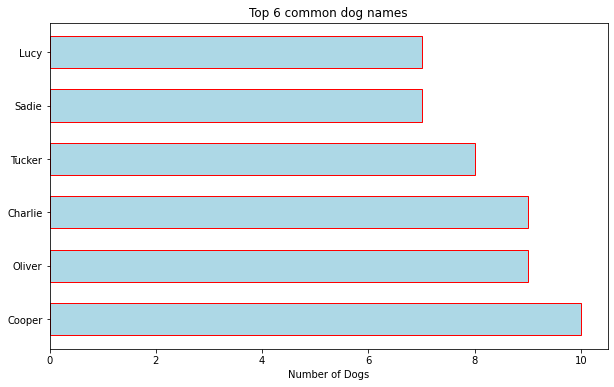

In [93]:
master.name.value_counts()[1:7].plot.barh(width=0.6,edgecolor='red',facecolor='lightblue',figsize=(10,6),title='Top 6 common dog names').set_xlabel("Number of Dogs");

**5. Most Popular Dog_stage**

In [94]:
master.groupby('dog_stage')['favorite_count'].count()

dog_stage
doggo          47
floofer         7
multiclass      8
pupper        143
puppo          19
Name: favorite_count, dtype: int64

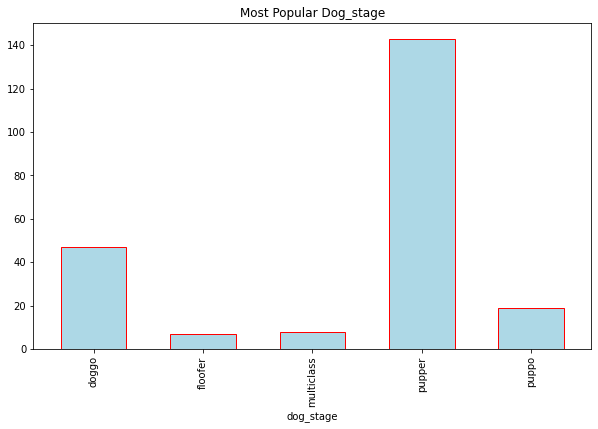

In [95]:
master.groupby('dog_stage')['favorite_count'].count().plot.bar(width=0.6,edgecolor='red',facecolor='lightblue',title='Most Popular Dog_stage',figsize=(10,6));

**6. Dog stage with the higest image post**

In [96]:
master.groupby('dog_stage')['img_num'].count()

dog_stage
doggo          47
floofer         7
multiclass      8
pupper        143
puppo          19
Name: img_num, dtype: int64

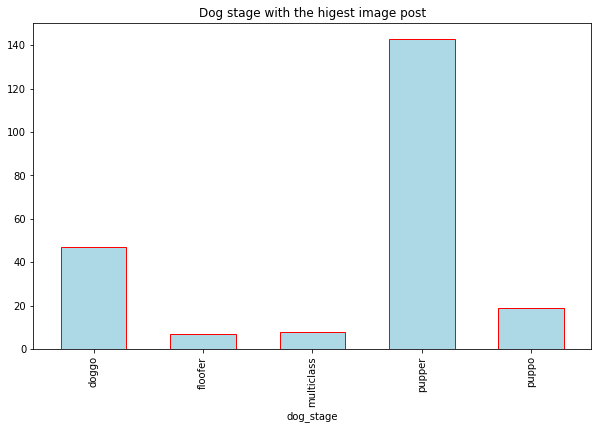

In [97]:
master.groupby('dog_stage')['img_num'].count().plot.bar(width=0.6,edgecolor='red',facecolor='lightblue',title='Dog stage with the higest image post',figsize=(10,6));

**7. Top 10 common dog_breed_prediction**

In [98]:
master.dog_breed_prediction.value_counts()[1:11]

labrador_retriever    88
pembroke              85
chihuahua             76
pug                   52
chow                  41
samoyed               39
pomeranian            37
toy_poodle            36
malamute              29
cocker_spaniel        27
Name: dog_breed_prediction, dtype: int64

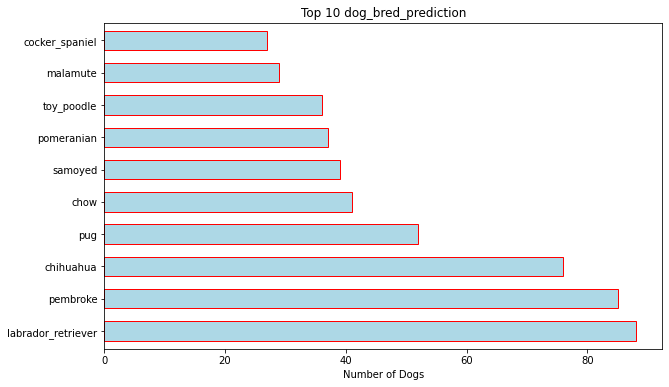

In [99]:
master.dog_breed_prediction.value_counts()[1:11].plot.barh(width=0.6,edgecolor='red',facecolor='lightblue',figsize=(10,6),title='Top 10 dog_bred_prediction').set_xlabel("Number of Dogs");